In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import data analysis and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the training dataset
train_df = pd.read_excel('/content/drive/MyDrive/DSW_ML_Assignment-Dec24/train_data.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
# Display the first few rows of the dataset to get an overview
train_df.head()

customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [9]:
# Get information about the dataset, including data types and missing values
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [10]:
# Calculate and print the number of missing values for each column
missing_values = train_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [11]:
# Calculate and print the percentage of missing values for each column
missing_percentage = (missing_values / len(train_df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Percentage of Missing Values:
 customer_id            0.0
transaction_date       0.0
sub_grade              0.0
term                   0.0
home_ownership         0.0
cibil_score            0.0
total_no_of_acc        0.0
annual_inc             0.0
int_rate               0.0
purpose                0.0
loan_amnt              0.0
application_type       0.0
installment            0.0
verification_status    0.0
account_bal            0.0
emp_length             0.0
loan_status            0.0
dtype: float64


In [12]:
# Print the data types of each column
print("\nData Types:\n", train_df.dtypes)


Data Types:
 customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                      object
term                           object
home_ownership                 object
cibil_score                     int64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float64
purpose                        object
loan_amnt                       int64
application_type               object
installment                   float64
verification_status            object
account_bal                     int64
emp_length                      int64
loan_status                     int64
dtype: object


In [13]:
# Print descriptive statistics of the numerical columns
print("\nStatistical Summary:\n", train_df.describe())


Statistical Summary:
         customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%  

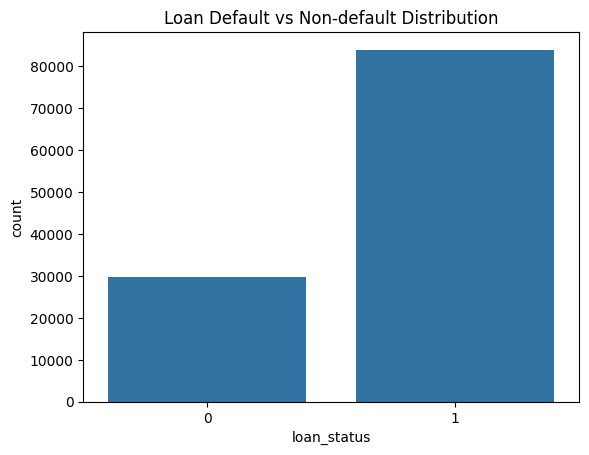

In [14]:
# Visualize the distribution of the target variable 'loan_status' (0: Non-default, 1: Default)
sns.countplot(x='loan_status', data=train_df)
plt.title('Loan Default vs Non-default Distribution')
plt.show()

Index(['customer_id', 'transaction_date', 'sub_grade', 'term',
       'home_ownership', 'cibil_score', 'total_no_of_acc', 'annual_inc',
       'int_rate', 'purpose', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'account_bal', 'emp_length', 'loan_status'],
      dtype='object')


<Figure size 1500x1000 with 0 Axes>

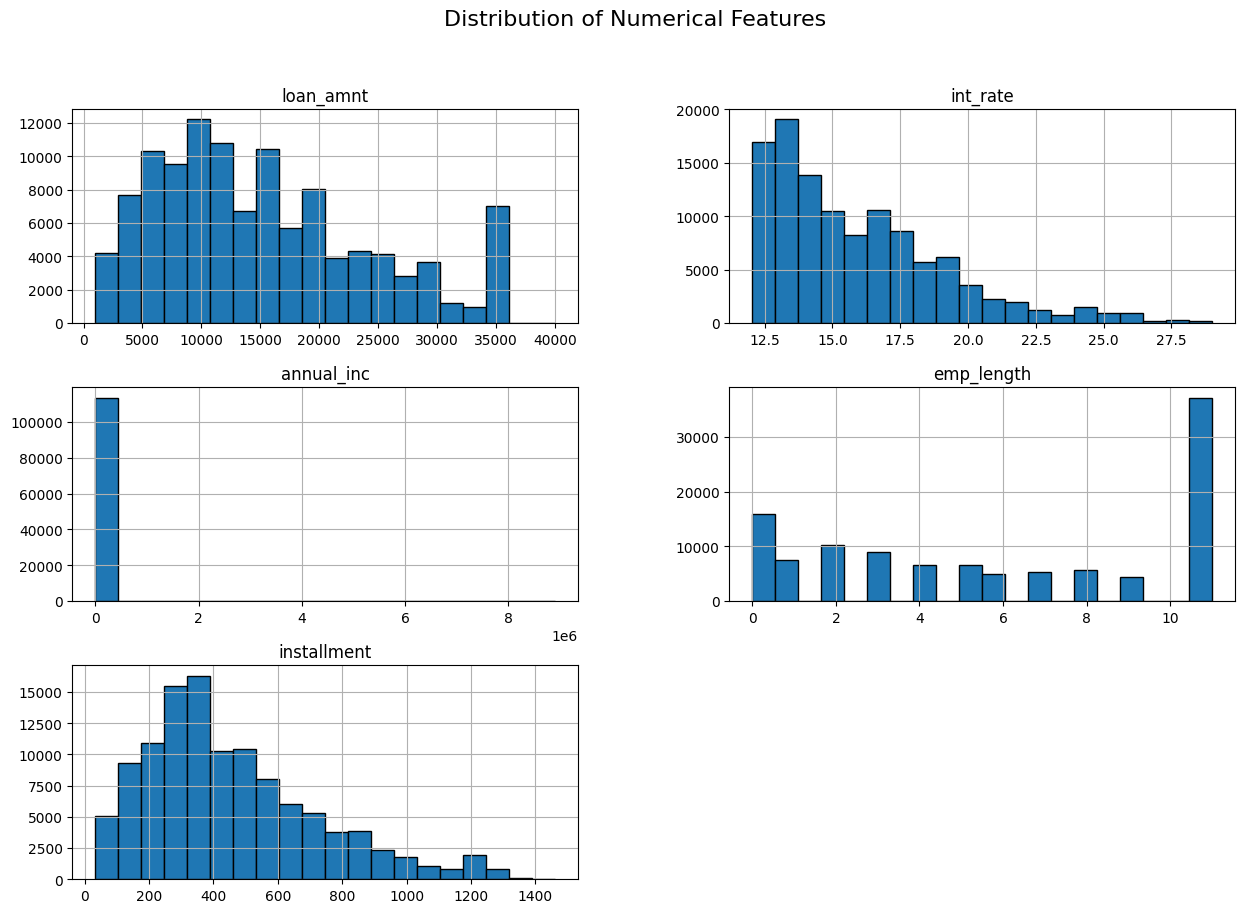

In [15]:
# Print the column names of the dataset
print(train_df.columns)

# Define a list of numerical columns for analysis
numerical_columns = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'emp_length', 'installment']

# Visualize the distribution of numerical features using histograms
plt.figure(figsize=(15, 10))
train_df[numerical_columns].hist(bins=20, edgecolor='black', figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()




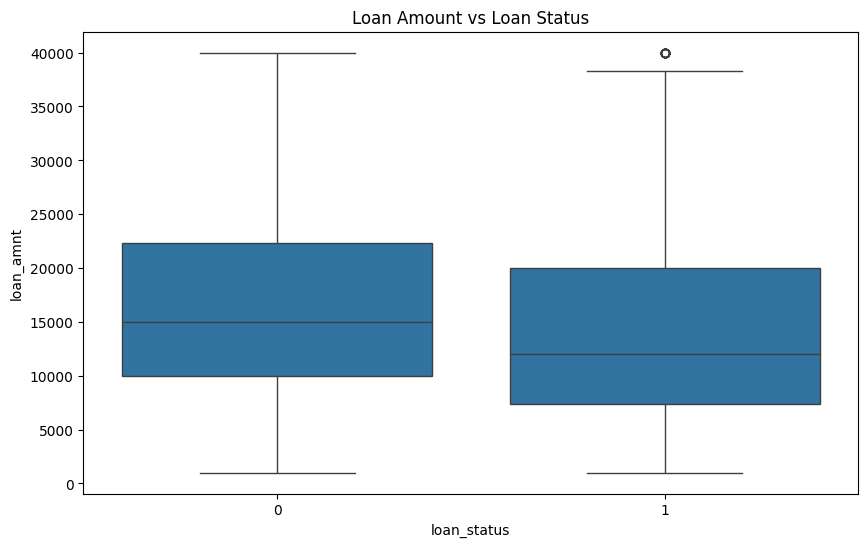

In [16]:
# Visualize the relationship between 'loan_amnt' and 'loan_status' using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=train_df)
plt.title('Loan Amount vs Loan Status')
plt.show()

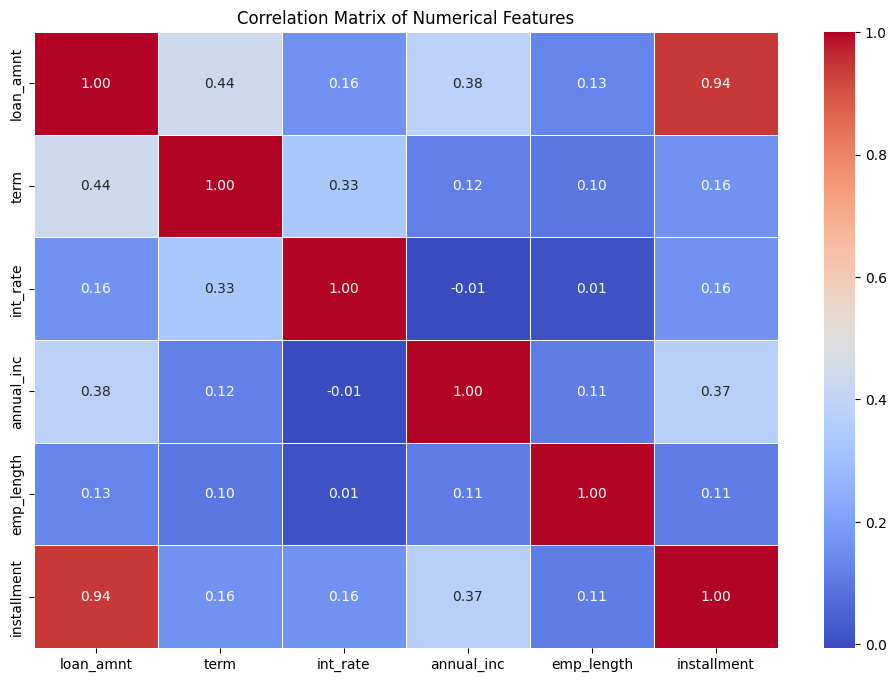

In [17]:
# Convert 'term' column to numeric values (remove ' months' and convert to integer)
train_df['term'] = train_df['term'].str.replace(' months', '').astype(int)

# Calculate and visualize the correlation matrix of numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = train_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


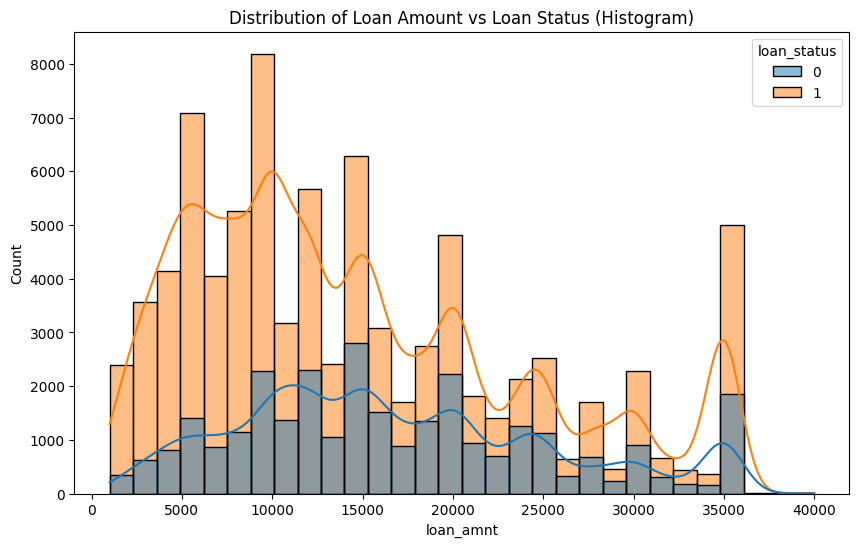

In [18]:
# Visualize the distribution of 'loan_amnt' based on loan status using histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='loan_amnt', hue='loan_status', kde=True, bins=30)
plt.title('Distribution of Loan Amount vs Loan Status (Histogram)')
plt.show()

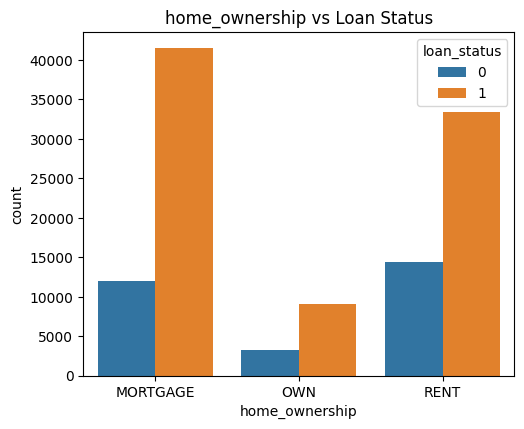

In [19]:
# Define a list of categorical columns for analysis
categorical_columns = ['loan_grade', 'loan_subgrade', 'home_ownership', 'income_verification_status', 'loan_purpose', 'state_code']

# Visualize relationships between categorical columns and loan_status using count plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    if col in train_df.columns:  # Check if the column exists in the dataset
        plt.subplot(3, 3, i)
        sns.countplot(x=col, hue='loan_status', data=train_df)
        plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()
